Plot of the DLVO potential. 

Debye length= 3.006052077360499e-09
kappa.a= 4.324609043837594
sigma= 0.007071763279430414
Q= 1.5018421307011224e-17
Z= 93.73762305190293
Vmax/kT= 3.800709024515378
W= 5.171899877442882
k= 1.0787481010666668e-17
k*= 2.0857868996490072e-18
rho0= 1.0866291062259582e+21
tau= 0.0008824268751006469
mu_e= 1.1510444162906e-08


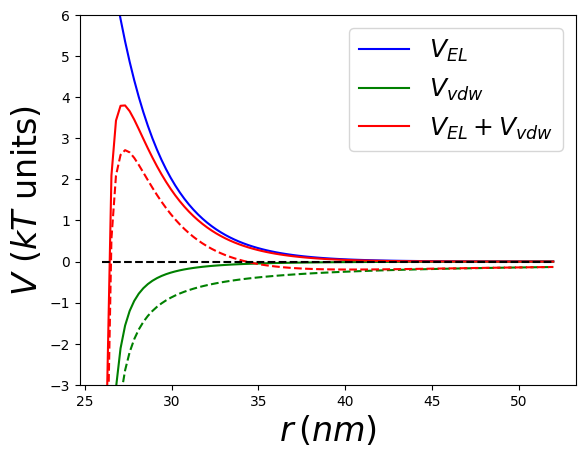

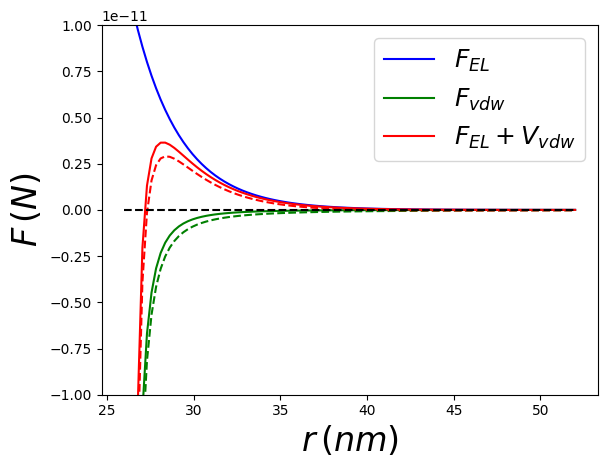

In [1]:
from pylab import *
%matplotlib inline 

# Constants 
elc = 1.60217646e-19
eps = 6.9062664977436e-10
kT  = 4.045305379e-21
Na  = 6.0221415e+23

# Input parameters
a     = 13.0e-9       # m
psi_s = 0.025*elc/kT           # dimensionless  psi_s = Psi_s*elc/kT 1.3856980472917875 *elc/kT #
I     = 0.01        # mol/L
rmax  = 4.0*a        # m
A     = 3.21*kT       # 13 zJ = 13e-21 J (polystyrene spheres across water)      
eta   = .001          # viscosity of water in Pa.s
phi   = 0.01        # volume fraction 

# Calculations and plot for constant potential
r = linspace(2.000000001*a,rmax,100)

n0    = I*1000*Na
kappa = sqrt(2*n0*elc**2/(eps*kT))

print("Debye length=", 1/kappa)
print("kappa.a=",kappa*a)

# Electrostatic potential of interaction 
V_EL = eps*(kT/elc)**2 * 4*pi * psi_s**2 * a**2 * exp(-kappa*(r-2*a)) / r
# Electrostatic force
F_EL = eps*(kT/elc)**2 * 4*pi * psi_s**2 * a**2 * exp(-kappa*(r-2*a)) / r**2 * (1+kappa*r)

# van der Waals potential of interaction 
V_vdw = - A/3.0 * (a**2/(r**2-4*a**2) + a**2/r**2 + 0.5*log(1.0-4*a**2/r**2))  # note "log" is ln; use "log10" for inverse of 10**x
F_vdw = - A * 32 * a**6 / (3*r**3*(r**2-4*a**2)**2)
# at short distance 
V_vdw_short = - A * a / (12*(r-2*a))
F_vdw_short = - A * a / (12*(r-2*a)**2)

# Plot the potential
close('all')
figure()
plot(r*1.0e9, V_EL/kT, 'b', label='$V_{EL}$')
plot(r*1.0e9, V_vdw/kT, 'g', label='$V_{vdw}$')
plot(r*1.0e9, V_vdw_short/kT, '--g')
plot(r*1.0e9, V_EL/kT+V_vdw_short/kT, '--r')
plot(r*1.0e9, V_EL/kT+V_vdw/kT, 'r', label='$V_{EL}+V_{vdw}$')
xlabel('$r\,(nm)$', fontsize=24)
ylabel('$V$ ($kT$ units)', fontsize=24)
ylim(-3,6)
plot(array([2*a,rmax])*1.0e9,[0,0],'--k')
legend(loc='upper right', fontsize=18)
savefig('DLVOpotential.pdf')

# Plot the force
figure()
plot(r*1.0e9, F_EL, 'b', label='$F_{EL}$')
plot(r*1.0e9, F_vdw, 'g', label='$F_{vdw}$')
plot(r*1.0e9, F_vdw_short, '--g')
plot(r*1.0e9, F_EL+F_vdw, 'r', label='$F_{EL}+V_{vdw}$')
plot(r*1.0e9, F_EL+F_vdw_short, '--r')
xlabel('$r\,(nm)$', fontsize=24)
ylabel('$F\,(N)$', fontsize=24)
plot(array([2*a,rmax])*1.0e9,[0,0],'--k')
legend(loc='upper right', fontsize=18)
ylim(-1e-11,1e-11)
savefig('DLVOforce.pdf')

# Surface charge density 
sigma = (psi_s*kT/elc)*eps*(1+kappa*a)/a
print("sigma=",sigma)

# Total charge 
Q = sigma*4*pi*a**2 
Z = Q/elc 
print("Q=",Q)
print("Z=",Z)

# Maximum of V/kT 
Vmax = (V_EL/kT+V_vdw/kT).max() 
print("Vmax/kT=",Vmax)

# Stability ratio 
W = exp(Vmax)/(2*kappa*a)
print("W=",W)

# perikinetic aggregation rate 
k = 8*kT/(3*eta)
print("k=",k)
kstar = k/W 
print("k*=",kstar)

# aggregation characteristic time 
Vp = 4./3*pi*a**3 
rho0 = phi/Vp 
print("rho0=",rho0)
tau = 2/(kstar*rho0) 
print("tau=",tau)

# electrophoretic mobility 
mu_e = 2*eps*(psi_s*kT/elc)/(3*eta)
print("mu_e=",mu_e)